# Import Data


In [1]:
#Importing the basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt

#STATSMODELS
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore') 

#Data
pd.set_option('display.max_columns', 150)
data = pd.read_csv('data/kc_house_data.csv')
data

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0          5650     1.0         NaN   0.0          3      7        1180   
1          7242     2.0         0.0   0.0          3      7        2170   
2         10000     1.0         0.0   0.0          3      6         770   
3          5000     1.0         0.0   0.0          5      7        1050   
4          8080     1.0         0.0   0.0          3      8        1680   
...         ...     ...         ...   ...        ...    ...         ...   
21592      1131     3.0         0.0   0.0          3      8        1530   
21593      5813     2.0         0.0   0.0          3      8        2310   
21594      1350     2.0         0.0   0.0          3      7        1020   
21595      2388     2.0         NaN   0.0          3      8        1600   
21596      1076     2.0         0.0   0.0          3      7        1020   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0               0.0      1955           0.0    98178  47.5112 -122.257   
1             400.0      1951        1991.0    98125  47.7210 -122.319   
2               0.0      1933           NaN    98028  47.7379 -122.233   
3             910.0      1965           0.0    98136  47.5208 -122.393   
4               0.0      1987           0.0    98074  47.6168 -122.045   
...             ...       ...           ...      ...      ...      ...   
21592           0.0      2009           0.0    98103  47.6993 -122.346   
21593           0.0      2014           0.0    98146  47.5107 -122.362   
21594           0.0      2009           0.0    98144  47.5944 -122.299   
21595           0.0      2004           0.0    98027  47.5345 -122.069   
21596           0.0      2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The data only has a few missing values to deal with:
* Waterfront
* View
* yr_renovated

In [3]:
# Get the five point statistics of dataframe
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

## Inital Correlation

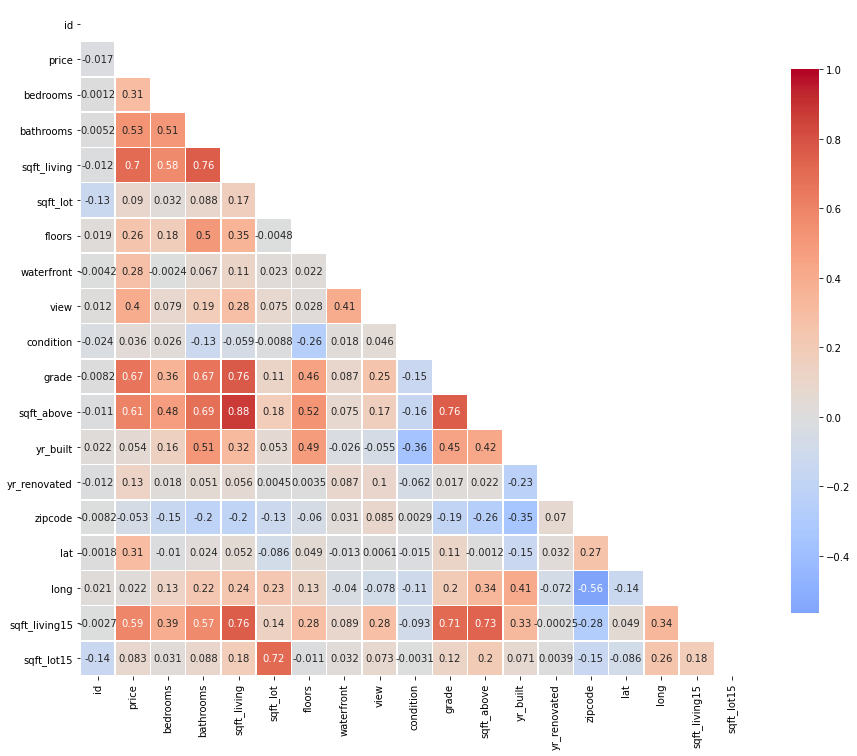

In [4]:
# check correlation between variables
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

In [5]:
# Save the absolute value of correlation as a data frame
data_corr = data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# Zip the variables name columns in a new column named pairs
data_corr['pairs'] = list(zip(data_corr.level_0, data_corr.level_1))
# set index to pairs
data_corr.set_index(['pairs'], inplace = True)
# Drop Level columns
data_corr.drop(columns=['level_0', 'level_1'], inplace = True)
#rename 0 to cc for correlation
data_corr.columns = ['cc']
# drop duplicates
data_corr.drop_duplicates(inplace=True)
# create a data frame with pairs
data_corr[(data_corr.cc > .75) & (data_corr.cc < 1)]

cc
pairs                                 
(sqft_living, sqft_above)     0.876448
(grade, sqft_living)          0.762779
(sqft_living, sqft_living15)  0.756402
(sqft_above, grade)           0.756073
(sqft_living, bathrooms)      0.755758

* The shows the highest correlation close to hot red and the lowest being gray.
* The dataframe shows that the sqaure foot specific columns are often strongly correlated.
* Sqft_living has the most correlations with other independent variables. 
* Later on I think sqft_above and grade would help eliminate some of the multicollinearity.

# Feature Engineering

## Basic Cleaning

In [6]:
# Change the date to datetime and pull out the month from each date to access for later
data['date'] = pd.to_datetime(data['date'])
release_month = data['date'].dt.month
data['month'] = release_month

In [7]:
#check for any weird values amongst the columns
for col in data:
    print(col)
    print(data[col].value_counts(normalize=True))
    print('-------------------------------')

id
795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
                ...   
7812801125    0.000046
4364700875    0.000046
3021059276    0.000046
880000205     0.000046
1777500160    0.000046
Name: id, Length: 21420, dtype: float64
-------------------------------
date
2014-06-23    0.006575
2014-06-25    0.006066
2014-06-26    0.006066
2014-07-08    0.005880
2015-04-27    0.005834
                ...   
2014-07-27    0.000046
2015-03-08    0.000046
2014-11-02    0.000046
2015-05-15    0.000046
2015-05-24    0.000046
Name: date, Length: 372, dtype: float64
-------------------------------
price
350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
              ...   
870515.0    0.000046
336950.0    0.000046
386100.0    0.000046
176250.0    0.000046
884744.0    0.000046
Name: price, Length: 3622, dtype: float64
-------------------------------
bedrooms
3     0.454878
4     0

* Id: has a few duplicates that needs some more analyzing.
* Sqft_basement: has '?' that needs changing.
* Waterfront: has NaN values
* Yr_renovated: 95% are 0 values.
* Views: 90% values are 0.

### ID

In [8]:
# Lets pull out all the duplicates and see why they're there
house_id = data['id']
duplicate_ids = data[house_id.isin(house_id[house_id.duplicated()])].sort_values('id')
duplicate_ids

id       date     price  bedrooms  bathrooms  sqft_living  \
2495      1000102 2015-04-22  300000.0         6       3.00         2400   
2494      1000102 2014-09-16  280000.0         6       3.00         2400   
16800     7200179 2014-10-16  150000.0         2       1.00          840   
16801     7200179 2015-04-24  175000.0         2       1.00          840   
11422   109200390 2014-10-20  250000.0         3       1.75         1480   
...           ...        ...       ...       ...        ...          ...   
6339   9828200460 2014-06-27  260000.0         2       1.00          700   
15186  9834200305 2015-02-10  615000.0         3       1.00         1790   
15185  9834200305 2014-07-16  350000.0         3       1.00         1790   
1084   9834200885 2014-07-17  360000.0         4       2.50         2080   
1085   9834200885 2015-04-20  550000.0         4       2.50         2080   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
2495       9373     2.0         0.0   0.0          3      7        2400   
2494       9373     2.0         NaN   0.0          3      7        2400   
16800     12750     1.0         0.0   0.0          3      6         840   
16801     12750     1.0         0.0   0.0          3      6         840   
11422      3900     1.0         0.0   0.0          4      7        1480   
...         ...     ...         ...   ...        ...    ...         ...   
6339       4800     1.0         0.0   0.0          3      7         700   
15186      3876     1.5         0.0   0.0          5      7        1090   
15185      3876     1.5         0.0   0.0          5      7        1090   
1084       4080     1.0         0.0   0.0          5      7        1040   
1085       4080     1.0         0.0   0.0          5      7        1040   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
2495            0.0      1991           0.0    98002  47.3262 -122.214   
2494            0.0      1991           0.0    98002  47.3262 -122.214   
16800           0.0      1925           0.0    98055  47.4840 -122.211   
16801           0.0      1925           NaN    98055  47.4840 -122.211   
11422           0.0      1980           0.0    98023  47.2977 -122.367   
...             ...       ...           ...      ...      ...      ...   
6339            0.0      1922           0.0    98122  47.6147 -122.300   
15186         700.0      1904           0.0    98144  47.5750 -122.288   
15185             ?      1904           0.0    98144  47.5750 -122.288   
1084         1040.0      1962           0.0    98144  47.5720 -122.290   
1085         1040.0      1962           0.0    98144  47.5720 -122.290   

       sqft_living15  sqft_lot15  month  
2495            2060        7316      4  
2494            2060        7316      9  
16800           1480        6969     10  
16801           1480        6969      4  
11422           1830        6956     10  
...              ...         ...    ...  
6339            1440        4800      6  
15186           1360        4080      2  
15185           1360        4080      7  
1084            1340        4080      7  
1085            1340        4080      4  

[353 rows x 22 columns]

**It seems the duplicates are the same house but were sold on different dates and for different amounts. I suggest with go with the more recent date, which is more relevant to our problem.**

In [9]:
# First I'm going to sort the value by date, then keep the duplicate id with the recent date
data = data.sort_values('date', ascending=False).drop_duplicates(subset = 'id').sort_index()

### Sqft_Basement

In [10]:
# replace '?' with 0 from the sqft_basement column
data['sqft_basement'] = data['sqft_basement'].map(lambda x: 0 if x == '?' else x)
data['sqft_basement'] = data['sqft_basement'].astype('float')

In [11]:
data['has_basement'] = data['sqft_basement'].map(lambda x: 1 if x > 0 else 0)

### Waterfront

In [12]:
# replace the missing values with 0, assumption that means no waterfront view
data['waterfront'] = data['waterfront'].fillna(0)

### View

In [13]:
# since majority is 0
data['view'] = data['view'].fillna(data['view'].median())

### Yr_Renovated

In [14]:
data['yr_renovated'].fillna(0, inplace = True)
data['renovated'] = data['yr_renovated'].map(lambda x: 1 if x > 0 else 0)

In [15]:
data['bathrooms'] = round(data['bathrooms'])

In [16]:
data['floors'] = round(data['floors'])

## Explore Data

**What areas have the most/least expensive houses?**

<AxesSubplot:xlabel='long', ylabel='lat'>

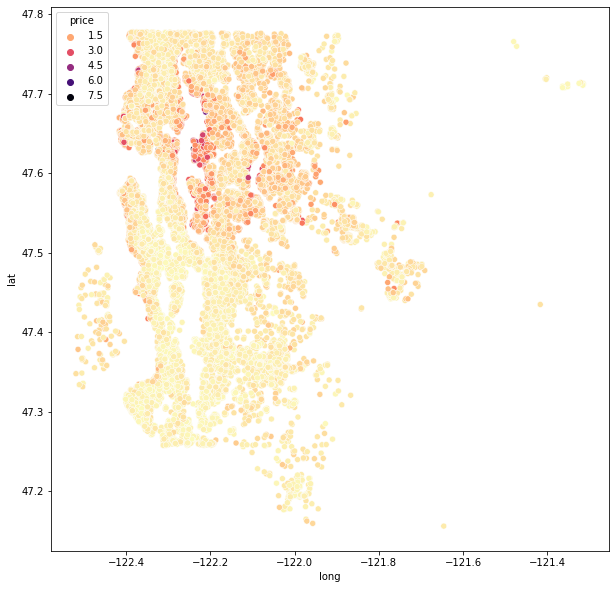

In [17]:
# pinpoint what location has expensive houses
plt.figure(figsize=[10,10])
sns.scatterplot(x='long', y='lat', hue='price', data=data, palette='magma_r')

**So it looks like the areas between (47.7, -122.1) and (47.6, -122.2) show the most expensive houses. Moving more south shows houses that are a little less expensive. We also see expensive houses that are near the waterfront.**

**Could grade play an important part in buying a house**

In [18]:
import plotly.express as px
fig = px.box(data, x='grade', y='price').update_xaxes(categoryorder = 'total ascending')
fig.show()

**Observations:**
It looks like the grade of a huse can affect the price. Though looking at the average of buying a house in King County(around 540,000), we can get a house with a grade 8 and build it up to a 9 and sell the house to make a profit. Somewhere around 200k between the medians. 

**Does the number of bedrooms significantly affect prices for homes with 2 to 6 bedrooms?**

In [19]:
fam_two_four = data[(data['bedrooms'] > 1) & (data['bedrooms'] <= 6)]

In [20]:
import plotly.express as px

fig = px.box(fam_two_four, x='bedrooms', y='price').update_xaxes(categoryorder = 'total ascending')
fig.show()

* The number of bedrooms does affect the price. Though the median between 2 and 3 is only about 40K. 
* The biggest jump is between 3 and 4 bedrooms with the difference being 135K.
* The next jumps 4-5: 70K and 5-6: 40K.

**Conclusion: Looking for 2 or 3 bedrooms seems the way to go unless you have at least 140K extra sitting around if you want more rooms**

## Linear regression of highly correlated variables
Comparing the highly correlated variables to see which ones are more correlated to price.

R-squared: 0.491814479424757


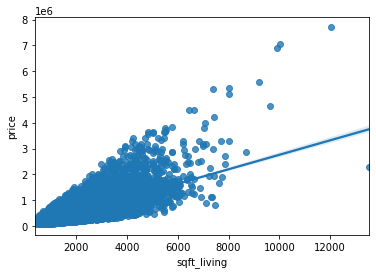

In [21]:
y = data['price']
sqft_living_X = data['sqft_living']
model = ols(formula = "y~sqft_living_X", data=data).fit()
print(f"R-squared: {model.rsquared}")
sns.regplot(x='sqft_living', y='price', data=data);

R-squared: 0.3653282501642636


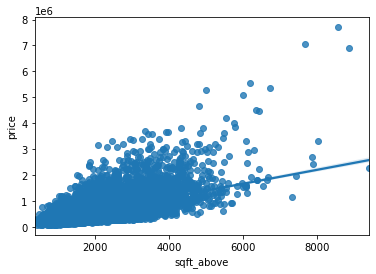

In [22]:
y = data['price']
sqft_above_X = data['sqft_above']
model = ols(formula = "y~sqft_above_X", data=data).fit()
print(f"R-squared: {model.rsquared}")
sns.regplot(x='sqft_above', y='price', data=data);

R-squared: 0.44466885912897147


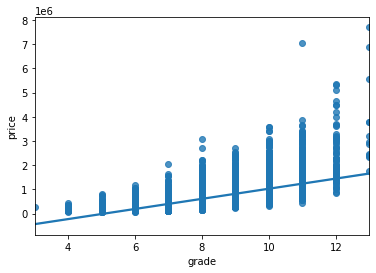

In [23]:
y = data['price']
grade_X = data['grade']
model = ols(formula = "y~grade_X", data=data).fit()
print(f"R-squared: {model.rsquared}")
sns.regplot(x='grade', y='price', data=data);

R-squared: 0.3408127483532666


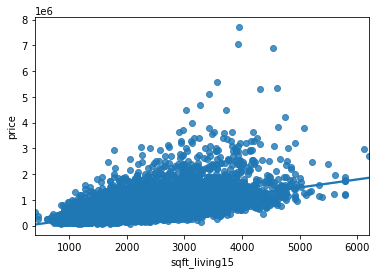

In [24]:
y = data['price']
sqft_living15_X = data['sqft_living15']
model = ols(formula = "y~sqft_living15_X", data=data).fit()
print(f"R-squared: {model.rsquared}")
sns.regplot(x='sqft_living15', y='price', data=data);

R-squared: 0.26956666796098705


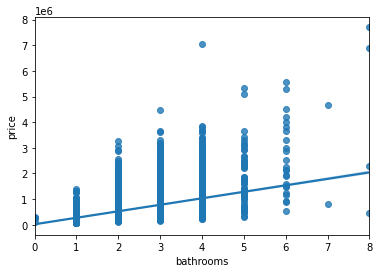

In [25]:
y = data['price']
bathrooms_X = data['bathrooms']
model = ols(formula = "y~bathrooms_X", data=data).fit()
print(f"R-squared: {model.rsquared}")
sns.regplot(x='bathrooms', y='price', data=data);

**Sqft_living has the highest collinearity with our dependent with grade right behind. Making sure to keep those two. Sqft_above has a high correlation with sqft_living and price, I want to keep it for now due to it's collinearity to price and deal with it later.**

In [26]:
# baseline_model: dropping irrelevent columns
data = data.drop(['id', 'date', 'yr_renovated', 'yr_built', 'sqft_basement'], axis=1)

## Correlation

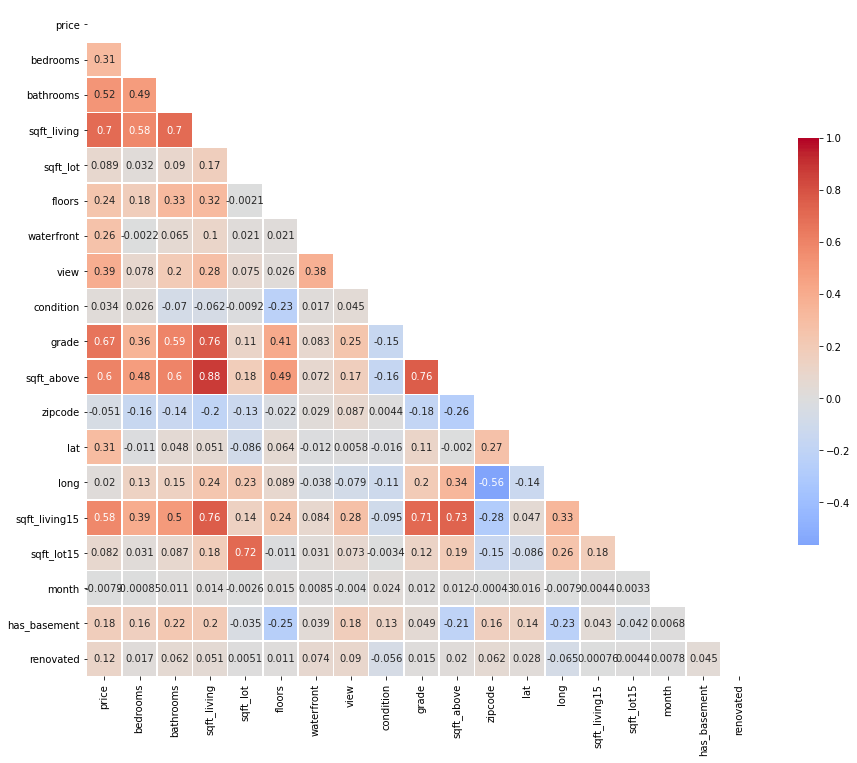

In [27]:
# Data cleaned correlation
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

**Correlation is a great to see the relationship between our dependent variable(pricing) and other independent variables. This way we can clean the data a bit. Columns to drop:** 
* sqft_living - high correlation with most of the varibales like sqft_above_base_sum, and they have the same correlation with price.
* sqft_lot15 - will use sqft_lot instead
* yr_built - low correlation

**Differences from the one before cleaning:**
* Waterfront and price went from 0.28 to 0.26.
* Some changes made give or take 0.01.


In [28]:
# Dataframe 2 with highest correlation
data_corr_2 = data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
data_corr_2['pairs_2'] = list(zip(data_corr_2.level_0, data_corr_2.level_1))
data_corr_2.set_index(['pairs_2'], inplace = True)
data_corr_2.drop(columns=['level_0', 'level_1'], inplace = True)
data_corr_2.columns = ['cc_2']
data_corr_2.drop_duplicates(inplace=True)
data_corr_2[(data_corr_2.cc_2 > .75) & (data_corr_2.cc_2 < 1)]

cc_2
pairs_2                               
(sqft_living, sqft_above)     0.876533
(grade, sqft_living)          0.762477
(sqft_above, grade)           0.756221
(sqft_living, sqft_living15)  0.756186

# Baseline Model

In [30]:
# Outcome is dependent and predictors are independent
outcome = 'price'
predictors = data.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
f = outcome + '~' + pred_sum
model = ols(f, data).fit()
print(f'List of predictors: {pred_sum}')
display(model.summary())

List of predictors: bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+zipcode+lat+long+sqft_living15+sqft_lot15+month+has_basement+renovated


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     2548.
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        02:21:36   Log-Likelihood:            -2.9262e+05
No. Observations:               21420   AIC:                         5.853e+05
Df Residuals:                   21401   BIC:                         5.854e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.172e+07   2.85e+06    -11.127      0.000   -3.73e+07   -2.61e+07
bedrooms       -3.33e+04   1959.001    -16.997      0.000   -3.71e+04   -2.95e+04
bathrooms      1.976e+04   2780.024      7.106      0.000    1.43e+04    2.52e+04
sqft_living     163.5618      6.146     26.614      0.000     151.516     175.608
sqft_lot          0.2070      0.049      4.193      0.000       0.110       0.304
floors        -1.354e+04   3217.512     -4.207      0.000   -1.98e+04   -7229.449
waterfront     6.156e+05   1.87e+04     32.911      0.000    5.79e+05    6.52e+05
view           5.944e+04   2188.610     27.159      0.000    5.51e+04    6.37e+04
condition      5.601e+04   2295.230     24.404      0.000    5.15e+04    6.05e+04
grade          7.582e+04   2161.490     35.078      0.000    7.16e+04    8.01e+04
sqft_above       29.0273      6.793      4.273      0.000      15.712      42.343
zipcode        -428.9721     33.920    -12.647      0.000    -495.457    -362.487
lat            6.752e+05   1.09e+04     61.806      0.000    6.54e+05    6.97e+05
long          -3.363e+05   1.32e+04    -25.411      0.000   -3.62e+05    -3.1e+05
sqft_living15    27.6781      3.573      7.746      0.000      20.674      34.682
sqft_lot15       -0.4020      0.076     -5.316      0.000      -0.550      -0.254
month         -3066.4037    455.017     -6.739      0.000   -3958.271   -2174.537
has_basement  -2315.7229   5250.501     -0.441      0.659   -1.26e+04    7975.652
renovated      1.294e+05   7863.984     16.455      0.000    1.14e+05    1.45e+05
==============================================================================
Omnibus:                    17892.076   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1640703.099
Skew:                           3.494   Prob(JB):                         0.00
Kurtosis:                      45.302   Cond. No.                     2.02e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Describe Model

* R-Sqaured: .677 is fine for a baseline model. Stating that 67.7% of variance can be explained by this model.
* Values with a p-value over .05 shows an insignificant relationship with price, like bathrooms.
* Coef: The higher the value the more the independent affects the increase of price.
* The model is a bit skewed to the left.
* This data has strong multi-collinearity.
* It's probably best to drop bathrooms, sqft_lot and sqft_lot15 with the high p-value and low coefficient.

## Model Validation

### Train-Test_Split

In [31]:
y = data['price']
X = predictors

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

17136 4284 17136 4284


In [33]:
# Baseline Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print('MAE:', mean_absolute_error(y_test, y_hat_test))
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)
print('Root Mean Squared Error Train:', rmse_train)
print('Root Mean Squared Error Test:', rmse_test)

MAE: 131091.61091700493
Train Mean Squared Error: 42943640036.205986
Test Mean Squared Error: 43219655114.78983
Root Mean Squared Error Train: 207228.4730344891
Root Mean Squared Error Test: 207893.3743888675


* The training and testing set are not that far apart.
* RSME is a bit high which is normal for a baseline model
* MAE is showing the average errors between the prediction and the actual value in our test set.

### Baseline QQ Plot
* This model needs a lot of improvement as it steers away from the line in both directions, which means our model can't explain the prices of houses above and below the line. 
* These values can be from extreme outliers in price.

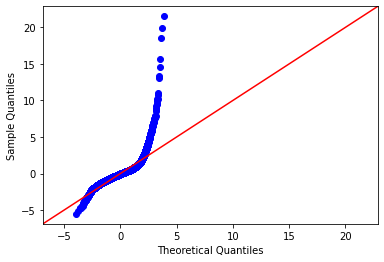

In [34]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

### Baseline Homoscedasticity?

* There is heteroscedasticity in this data.
* Price is unequal across the range of values of the predictors. 
* So the scatter of the dependent variable widens as the value of the independents increases.

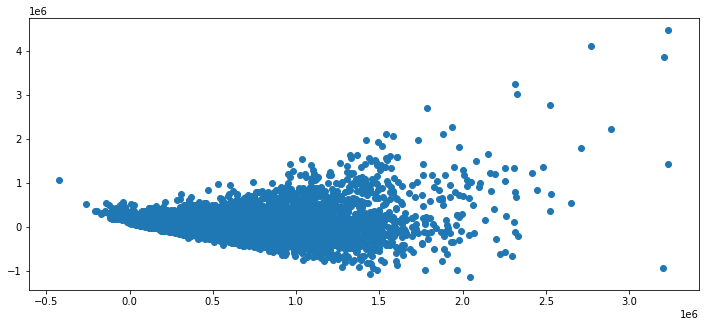

In [35]:
plt.figure(figsize=(12,5))
plt.scatter(model.predict(data), model.resid)

### Baseline Histogram
* This graph shows that the data is too peaked in the middle.
* The data is a bit skewed.

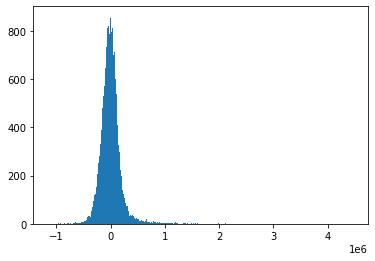

In [36]:
plt.hist(residuals, bins='auto');

**Dropping columns to get rid of some multicolinearity.**

In [37]:
data = data.drop(['sqft_above', 'sqft_lot15', 'sqft_living15'], axis=1)

## Categoricals/Continuous Variables

In [38]:
# making copy to keep my original data
df = data

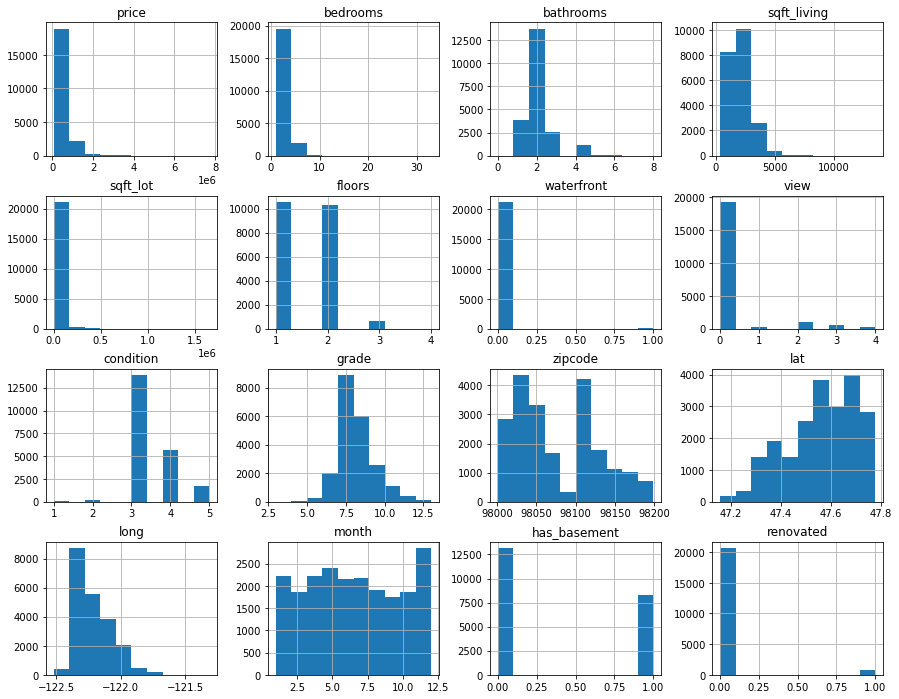

In [39]:
df.hist(figsize=(15,12));

* Grade looks normal
* Most of the graphs show some extreme outliers that need to be dealt with, like price and total_rooms.
* Here can definitely see what columns are categorical and continuous.

In [40]:
df['bedrooms']=df['bedrooms'].astype('object')
df['waterfront']=df['waterfront'].astype('object')
df['floors']=df['floors'].astype('object')
df['view']=df['view'].astype('object')
df['condition']=df['condition'].astype('object')
df['grade']=df['grade'].astype('object')
df['month']=df['month'].astype('object')

In [41]:
categoricals = df.select_dtypes(include='object')
continuous = df.select_dtypes(exclude='object')

# Iterative Modeling
* Deal with outliers
* Remove high p-values
* Create bins and dummy variables
* transform/log

## Outliers
* Get rid of some outliers

### Bedrooms

In [42]:
df['bedrooms'][15856]

33

In [43]:
# after some research and using the lat and long to find this house
df[df['bedrooms'] == 33]
df['bedrooms'][15856] = 3

## Get Dummies

In [44]:
cats = df.select_dtypes(include='object')

In [45]:
data_dummies = pd.get_dummies(cats, columns=['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                     'month'], drop_first=True)

In [46]:
df_dum = pd.concat((df, data_dummies), axis = 1)
df_dum.drop(columns=['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                     'month'], axis = 1, inplace=True)
df_dum

price  bathrooms  sqft_living  sqft_lot  zipcode      lat     long  \
0      221900.0        1.0         1180      5650    98178  47.5112 -122.257   
1      538000.0        2.0         2570      7242    98125  47.7210 -122.319   
2      180000.0        1.0          770     10000    98028  47.7379 -122.233   
3      604000.0        3.0         1960      5000    98136  47.5208 -122.393   
4      510000.0        2.0         1680      8080    98074  47.6168 -122.045   
...         ...        ...          ...       ...      ...      ...      ...   
21592  360000.0        2.0         1530      1131    98103  47.6993 -122.346   
21593  400000.0        2.0         2310      5813    98146  47.5107 -122.362   
21594  402101.0        1.0         1020      1350    98144  47.5944 -122.299   
21595  400000.0        2.0         1600      2388    98027  47.5345 -122.069   
21596  325000.0        1.0         1020      1076    98144  47.5941 -122.299   

       has_basement  renovated  bedrooms_2  bedrooms_3  bedrooms_4  \
0                 0          0           0           1           0   
1                 1          1           0           1           0   
2                 0          0           1           0           0   
3                 1          0           0           0           1   
4                 0          0           0           1           0   
...             ...        ...         ...         ...         ...   
21592             0          0           0           1           0   
21593             0          0           0           0           1   
21594             0          0           1           0           0   
21595             0          0           0           1           0   
21596             0          0           1           0           0   

       bedrooms_5  bedrooms_6  bedrooms_7  bedrooms_8  bedrooms_9  \
0               0           0           0           0           0   
1               0           0           0           0           0   
2               0           0           0           0           0   
3               0           0           0           0           0   
4               0           0           0           0           0   
...           ...         ...         ...         ...         ...   
21592           0           0           0           0           0   
21593           0           0           0           0           0   
21594           0           0           0           0           0   
21595           0           0           0           0           0   
21596           0           0           0           0           0   

       bedrooms_10  bedrooms_11  floors_2.0  floors_3.0  floors_4.0  \
0                0            0           0           0           0   
1                0            0           1           0           0   
2                0            0           0           0           0   
3                0            0           0           0           0   
4                0            0           0           0           0   
...            ...          ...         ...         ...         ...   
21592            0            0           0           1           0   
21593            0            0           1           0           0   
21594            0            0           1           0           0   
21595            0            0           1           0           0   
21596            0            0           1           0           0   

       waterfront_1.0  view_1.0  view_2.0  view_3.0  view_4.0  condition_2  \
0                   0         0         0         0         0            0   
1                   0         0         0         0         0            0   
2                   0         0         0         0         0            0   
3                   0         0         0         0         0            0   
4                   0         0         0         0         0            0   
...               ...       ...       ...       ...       

### Fix strings

In [47]:
df_dum.columns = df_dum.columns.str.replace('.','_').str.replace('_0','')

In [48]:
df_dum

price  bathrooms  sqft_living  sqft_lot  zipcode      lat     long  \
0      221900.0        1.0         1180      5650    98178  47.5112 -122.257   
1      538000.0        2.0         2570      7242    98125  47.7210 -122.319   
2      180000.0        1.0          770     10000    98028  47.7379 -122.233   
3      604000.0        3.0         1960      5000    98136  47.5208 -122.393   
4      510000.0        2.0         1680      8080    98074  47.6168 -122.045   
...         ...        ...          ...       ...      ...      ...      ...   
21592  360000.0        2.0         1530      1131    98103  47.6993 -122.346   
21593  400000.0        2.0         2310      5813    98146  47.5107 -122.362   
21594  402101.0        1.0         1020      1350    98144  47.5944 -122.299   
21595  400000.0        2.0         1600      2388    98027  47.5345 -122.069   
21596  325000.0        1.0         1020      1076    98144  47.5941 -122.299   

       has_basement  renovated  bedrooms_2  bedrooms_3  bedrooms_4  \
0                 0          0           0           1           0   
1                 1          1           0           1           0   
2                 0          0           1           0           0   
3                 1          0           0           0           1   
4                 0          0           0           1           0   
...             ...        ...         ...         ...         ...   
21592             0          0           0           1           0   
21593             0          0           0           0           1   
21594             0          0           1           0           0   
21595             0          0           0           1           0   
21596             0          0           1           0           0   

       bedrooms_5  bedrooms_6  bedrooms_7  bedrooms_8  bedrooms_9  \
0               0           0           0           0           0   
1               0           0           0           0           0   
2               0           0           0           0           0   
3               0           0           0           0           0   
4               0           0           0           0           0   
...           ...         ...         ...         ...         ...   
21592           0           0           0           0           0   
21593           0           0           0           0           0   
21594           0           0           0           0           0   
21595           0           0           0           0           0   
21596           0           0           0           0           0   

       bedrooms_10  bedrooms_11  floors_2  floors_3  floors_4  waterfront_1  \
0                0            0         0         0         0             0   
1                0            0         1         0         0             0   
2                0            0         0         0         0             0   
3                0            0         0         0         0             0   
4                0            0         0         0         0             0   
...            ...          ...       ...       ...       ...           ...   
21592            0            0         0         1         0             0   
21593            0            0         1         0         0             0   
21594            0            0         1         0         0             0   
21595            0            0         1         0         0             0   
21596            0            0         1         0         0             0   

       view_1  view_2  view_3  view_4  condition_2  condition_3  condition_4  \
0           0       0       0       0            0            1            0   
1           0       0       0       0            0            1            0   
2           0       0       0       0            0            1            0   
3           0       0       0       0            0            0            0   
4           0       0       0 

<AxesSubplot:>

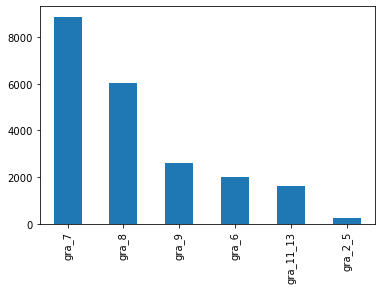

In [49]:
grade_labels = ['gra_2_5', 'gra_6', 'gra_7', 'gra_8', 'gra_9', 'gra_11_13']
grade_bins = [1, 5, 6, 7, 8, 9, 13]
df_dum['grade_bins'] = pd.cut(df['grade'], bins=grade_bins, labels=grade_labels)
df_dum['grade_bins'].value_counts().plot.bar()

In [50]:
df_dum.drop(columns=['grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 
                                'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13'], 
                       axis=1, inplace=True)

grade_dummies = pd.get_dummies(df_dum['grade_bins'])
df_dum = pd.concat((df_dum, grade_dummies), axis=1)
df_dum.drop('grade_bins', axis=1, inplace=True)

<AxesSubplot:>

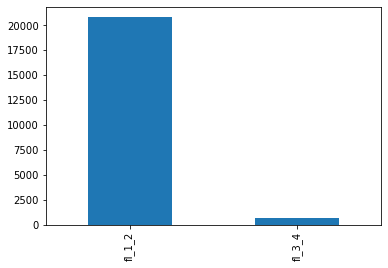

In [51]:
# fl_1_2 = (0,2], fl_3_4 = (2, 4]
floor_labels = ['fl_1_2', 'fl_3_4']
floor_bins = [0, 2, 4]
df_dum['fl_bins'] = pd.cut(df['floors'], bins=floor_bins, labels=floor_labels)
df_dum.drop(columns=['floors_2', 'floors_3', 'floors_4'], axis=1, inplace=True)
df_dum['fl_bins'].value_counts().plot.bar()

In [52]:
floors_dummies = pd.get_dummies(df_dum['fl_bins'])
df_dum = pd.concat((df_dum, floors_dummies), axis=1)
df_dum.drop('fl_bins', axis=1, inplace=True)

<AxesSubplot:>

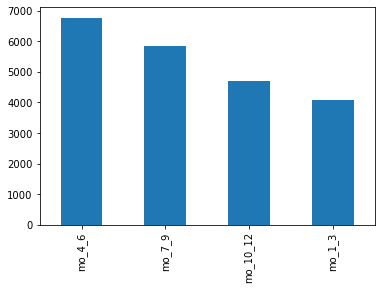

In [53]:
# month_1= [Jan.-Mar], month_2 = (Apr-Jun], month_3 = [July-Sept], month_4 = [Oct-Dec]
month_labels = ['mo_1_3', 'mo_4_6', 'mo_7_9', 'mo_10_12']
month_bins = [0, 3, 6, 9, 12]
df_dum['mon_bins'] = pd.cut(df['month'], bins=month_bins, labels=month_labels)
df_dum['mon_bins'].value_counts().plot.bar()

In [54]:
df_dum.drop(columns=['month_2', 'month_3', 'month_4', 'month_5', 'month_6', 
                                'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12'], axis=1, inplace=True)

month_dummies = pd.get_dummies(df_dum['mon_bins'])
df_dum = pd.concat((df_dum, month_dummies), axis=1)
df_dum.drop('mon_bins', axis=1, inplace=True)

<AxesSubplot:>

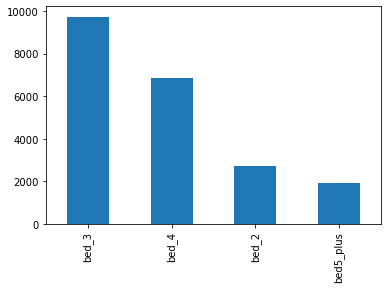

In [55]:
bed_labels = ['bed_2', 'bed_3', 'bed_4', 'bed5_plus']
bed_bins = [1, 2, 3, 4, 10]
df_dum['bed_bins'] = pd.cut(df['bedrooms'], bins=bed_bins, labels=bed_labels)
df_dum['bed_bins'].value_counts().plot.bar()

In [56]:
df_dum.drop(columns=['bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bedrooms_7', 
                     'bedrooms_8', 'bedrooms_9', 'bedrooms_10', 'bedrooms_11'], axis=1, inplace=True)

beds_dummies = pd.get_dummies(df_dum['bed_bins'])
df_dum = pd.concat((df_dum, beds_dummies), axis=1)
df_dum.drop('bed_bins', axis=1, inplace=True)

### Cities

In [57]:
cities = pd.read_csv('data/uszips.csv')
cities.head()

zip       lat       lng       city state_id   state_name  zcta  \
0  601  18.18004 -66.75218   Adjuntas       PR  Puerto Rico  True   
1  602  18.36073 -67.17517     Aguada       PR  Puerto Rico  True   
2  603  18.45439 -67.12202  Aguadilla       PR  Puerto Rico  True   
3  606  18.16724 -66.93828    Maricao       PR  Puerto Rico  True   
4  610  18.29032 -67.12243     Anasco       PR  Puerto Rico  True   

   parent_zcta  population  density  county_fips county_name  \
0          NaN       17242    111.4        72001    Adjuntas   
1          NaN       38442    523.5        72003      Aguada   
2          NaN       48814    667.9        72005   Aguadilla   
3          NaN        6437     60.4        72093     Maricao   
4          NaN       27073    312.0        72011      Añasco   

                              county_weights             county_names_all  \
0               {'72001':99.43,'72141':0.57}              Adjuntas|Utuado   
1                              {'72003':100}                       Aguada   
2                              {'72005':100}                    Aguadilla   
3  {'72093':94.88,'72121':1.35,'72153':3.78}  Maricao|Yauco|Sabana Grande   
4               {'72003':0.55,'72011':99.45}                Añasco|Aguada   

     county_fips_all  imprecise  military             timezone  
0        72001|72141      False     False  America/Puerto_Rico  
1              72003      False     False  America/Puerto_Rico  
2              72005      False     False  America/Puerto_Rico  
3  72093|72153|72121      False     False  America/Puerto_Rico  
4        72011|72003      False     False  America/Puerto_Rico

In [58]:
wa_cities = cities[cities['state_id'] == 'WA']
kc_cities = wa_cities[wa_cities['county_name'] == 'King']
kc_cities = kc_cities[['zip', 'city']]

In [59]:
df_cities = df_dum.join(kc_cities.set_index('zip'), on = 'zipcode', how = 'left')
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21420 non-null  float64
 1   bathrooms     21420 non-null  float64
 2   sqft_living   21420 non-null  int64  
 3   sqft_lot      21420 non-null  int64  
 4   zipcode       21420 non-null  int64  
 5   lat           21420 non-null  float64
 6   long          21420 non-null  float64
 7   has_basement  21420 non-null  int64  
 8   renovated     21420 non-null  int64  
 9   waterfront_1  21420 non-null  uint8  
 10  view_1        21420 non-null  uint8  
 11  view_2        21420 non-null  uint8  
 12  view_3        21420 non-null  uint8  
 13  view_4        21420 non-null  uint8  
 14  condition_2   21420 non-null  uint8  
 15  condition_3   21420 non-null  uint8  
 16  condition_4   21420 non-null  uint8  
 17  condition_5   21420 non-null  uint8  
 18  gra_2_5       21420 non-nu

In [60]:
df_cities = df_cities.drop('zipcode', axis=1)

In [61]:
city_dummies = pd.get_dummies(df_cities['city'], drop_first=True)
df_city = pd.concat((df_cities, city_dummies), axis=1)
df_city.drop('city', axis=1, inplace=True)

In [62]:
df_city.columns = df_city.columns.str.replace(' ','_')

In [63]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21420 non-null  float64
 1   bathrooms      21420 non-null  float64
 2   sqft_living    21420 non-null  int64  
 3   sqft_lot       21420 non-null  int64  
 4   lat            21420 non-null  float64
 5   long           21420 non-null  float64
 6   has_basement   21420 non-null  int64  
 7   renovated      21420 non-null  int64  
 8   waterfront_1   21420 non-null  uint8  
 9   view_1         21420 non-null  uint8  
 10  view_2         21420 non-null  uint8  
 11  view_3         21420 non-null  uint8  
 12  view_4         21420 non-null  uint8  
 13  condition_2    21420 non-null  uint8  
 14  condition_3    21420 non-null  uint8  
 15  condition_4    21420 non-null  uint8  
 16  condition_5    21420 non-null  uint8  
 17  gra_2_5        21420 non-null  uint8  
 18  gra_6 

## Model 2

In [65]:
# Outcome is dependent and predictors are independent
outcome = 'price'
predictors = df_city.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
f = outcome + '~' + pred_sum
model2 = ols(formula=f, data=df_city).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     1201.
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        02:22:32   Log-Likelihood:            -2.9025e+05
No. Observations:               21420   AIC:                         5.806e+05
Df Residuals:                   21367   BIC:                         5.810e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.641e+07   1.99e+06    -23.323      0.000   -5.03e+07   -4.25e+07
bathrooms      2.435e+04   2495.284      9.758      0.000    1.95e+04    2.92e+04
sqft_living     191.9669      2.873     66.815      0.000     186.335     197.598
sqft_lot          0.1115      0.034      3.325      0.001       0.046       0.177
lat            6.955e+05   2.01e+04     34.577      0.000    6.56e+05    7.35e+05
long          -4.577e+05   3.08e+04    -14.837      0.000   -5.18e+05   -3.97e+05
has_basement   -2.37e+04   3000.068     -7.898      0.000   -2.96e+04   -1.78e+04
renovated      8.888e+04   7087.603     12.541      0.000     7.5e+04    1.03e+05
waterfront_1   5.574e+05   1.91e+04     29.189      0.000     5.2e+05    5.95e+05
view_1         8.612e+04   1.05e+04      8.212      0.000    6.56e+04    1.07e+05
view_2         7.026e+04   6356.039     11.053      0.000    5.78e+04    8.27e+04
view_3         1.374e+05   8705.497     15.779      0.000     1.2e+05    1.54e+05
view_4         2.842e+05   1.32e+04     21.538      0.000    2.58e+05     3.1e+05
condition_2    5.233e+04   3.82e+04      1.371      0.170   -2.25e+04    1.27e+05
condition_3    4.621e+04   3.54e+04      1.304      0.192   -2.32e+04    1.16e+05
condition_4      8.1e+04   3.55e+04      2.284      0.022    1.15e+04    1.51e+05
condition_5    1.345e+05   3.57e+04      3.772      0.000    6.46e+04    2.04e+05
gra_2_5       -7.801e+06   3.32e+05    -23.530      0.000   -8.45e+06   -7.15e+06
gra_6         -7.822e+06   3.31e+05    -23.607      0.000   -8.47e+06   -7.17e+06
gra_7         -7.811e+06   3.32e+05    -23.557      0.000   -8.46e+06   -7.16e+06
gra_8         -7.781e+06   3.32e+05    -23.454      0.000   -8.43e+06   -7.13e+06
gra_9         -7.699e+06   3.32e+05    -23.203      0.000   -8.35e+06   -7.05e+06
gra_11_13     -7.491e+06   3.32e+05    -22.567      0.000   -8.14e+06   -6.84e+06
fl_1_2        -2.319e+07   9.95e+05    -23.317      0.000   -2.51e+07   -2.12e+07
fl_3_4        -2.322e+07   9.95e+05    -23.329      0.000   -2.52e+07   -2.13e+07
mo_1_3        -1.159e+07   4.97e+05    -23.302      0.000   -1.26e+07   -1.06e+07
mo_4_6        -1.159e+07   4.97e+05    -23.305      0.000   -1.26e+07   -1.06e+07
mo_7_9        -1.161e+07   4.97e+05    -23.342      0.000   -1.26e+07   -1.06e+07
mo_10_12      -1.161e+07   4.97e+05    -23.342      0.000   -1.26e+07   -1.06e+07
bed_2         -9184.0676   1.41e+04     -0.649      0.516   -3.69e+04    1.85e+04
bed_3         -3.964e+04   1.41e+04     -2.811      0.005   -6.73e+04    -1.2e+04
bed_4         -7.852e+04   1.44e+04     -5.459      0.000   -1.07e+05   -5.03e+04
bed5_plus     -9.877e+04   1.51e+04     -6.532      0.000   -1.28e+05   -6.91e+04
Bellevue       2.091e+05   1.02e+04     20.493      0.000    1.89e+05    2.29e+05
Black_Diamond  1.347e+05   2.08e+04      6.463   

* After binning and adding cities, the R-squared went up considerably.
* This model is less skewed than the baseline. 
* There are a few variables that have high p-values we should consider dropping.

### Train-Test-Split 2

In [66]:
y = df_city['price']
X = predictors

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

17136 4284 17136 4284


In [68]:
# Model 2
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print('MAE:', mean_absolute_error(y_test, y_hat_test))
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)
print('Root Mean Squarred Error Train:', rmse_train)
print('Root Mean Squarred Error Test:', rmse_test)

MAE: 114721.39339524545
Train Mean Squarred Error: 35019754517.44809
Test Mean Squarred Error: 32263842325.695347
Root Mean Squarred Error Train: 187135.65805972973
Root Mean Squarred Error Test: 179621.38604769573


## Transform
**Use log transformation on non-normal variables and a create a more normal distribution**

In [69]:
df_log = df_city.copy()

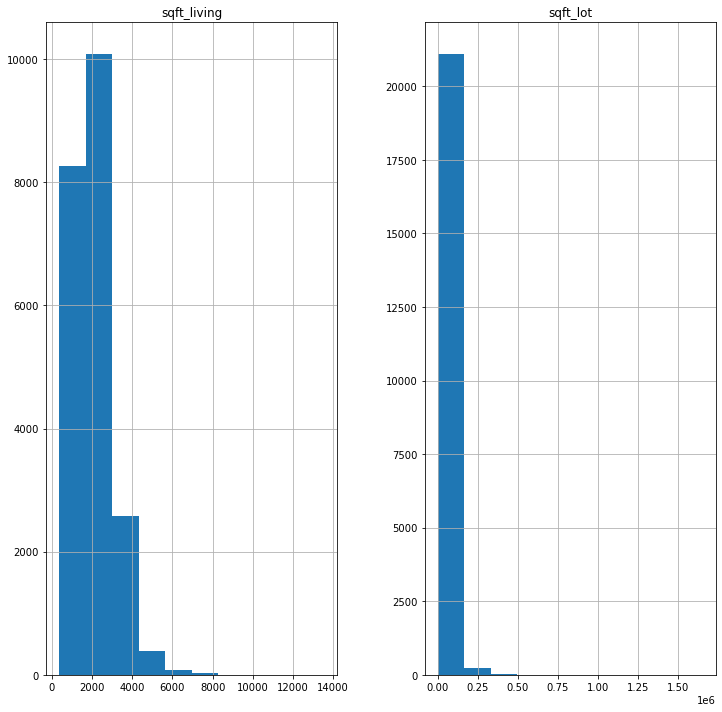

In [70]:
df_log[['sqft_living', 'sqft_lot']].hist(figsize=(12,12));

**On the left you can see the data for all of them are a bit skewed to the left. So it's best to use log transformation on these.**

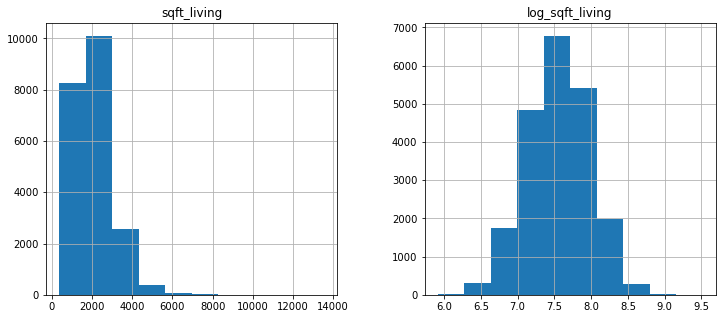

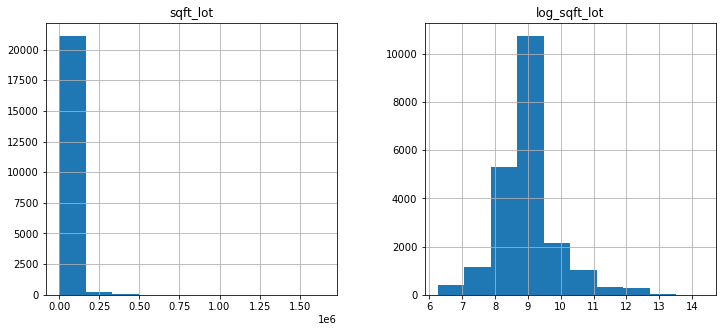

In [71]:
df_log['log_sqft_living'] = np.log(df_city['sqft_living'])
df_log[['sqft_living', 'log_sqft_living']].hist(figsize=(12,5));

df_log['log_sqft_lot'] = np.log(df_city['sqft_lot'])
df_log[['sqft_lot', 'log_sqft_lot']].hist(figsize=(12,5));

In [72]:
df_log_norm = df_log[['log_sqft_living', 'log_sqft_lot']]
df_log_norm

log_sqft_living  log_sqft_lot
0             7.073270      8.639411
1             7.851661      8.887653
2             6.646391      9.210340
3             7.580700      8.517193
4             7.426549      8.997147
...                ...           ...
21592         7.333023      7.030857
21593         7.745003      8.667852
21594         6.927558      7.207860
21595         7.377759      7.778211
21596         6.927558      6.981006

[21420 rows x 2 columns]

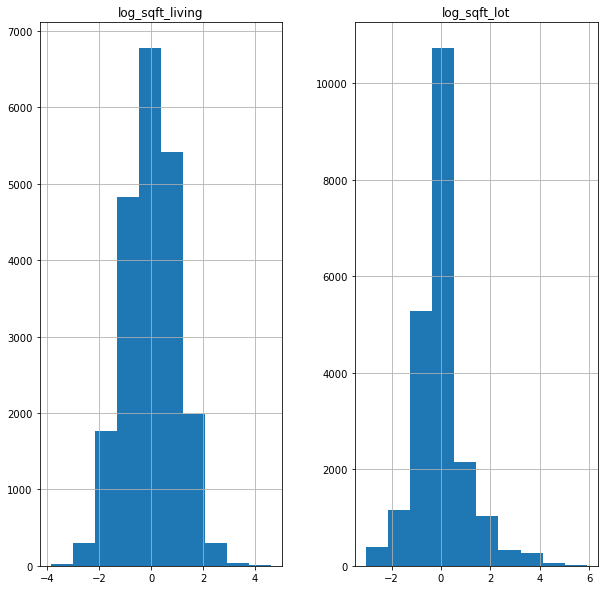

In [73]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_log_norm = df_log_norm.apply(normalize)
df_log_norm.hist(figsize=(10,10));

In [74]:
df_log['log_sqft_living'] = df_log_norm['log_sqft_living']
df_log['log_sqft_lot'] = df_log_norm['log_sqft_lot']

In [75]:
df_log = df_log.drop(columns={'sqft_lot', 'sqft_living'}, axis=1)

## Model 3
* Featuring the transformation

In [77]:
# Outcome is dependent and predictors are independent
outcome = 'price'
predictors = df_log.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
f = outcome + '~' + pred_sum
model3 = ols(formula=f, data=df_log).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1028.
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        02:23:36   Log-Likelihood:            -2.9146e+05
No. Observations:               21420   AIC:                         5.830e+05
Df Residuals:                   21367   BIC:                         5.835e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -4.429e+07   2.12e+06    -20.911      0.000   -4.84e+07   -4.01e+07
bathrooms         5.17e+04   2614.372     19.774      0.000    4.66e+04    5.68e+04
lat              7.031e+05   2.13e+04     32.995      0.000    6.61e+05    7.45e+05
long            -4.248e+05   3.28e+04    -12.950      0.000   -4.89e+05   -3.61e+05
has_basement    -2.005e+04   3224.366     -6.218      0.000   -2.64e+04   -1.37e+04
renovated        9.154e+04   7507.783     12.193      0.000    7.68e+04    1.06e+05
waterfront_1      5.72e+05   2.02e+04     28.310      0.000    5.32e+05    6.12e+05
view_1            9.79e+04   1.11e+04      8.818      0.000    7.61e+04     1.2e+05
view_2           8.393e+04   6730.714     12.470      0.000    7.07e+04    9.71e+04
view_3           1.602e+05   9206.884     17.405      0.000    1.42e+05    1.78e+05
view_4           3.206e+05    1.4e+04     22.969      0.000    2.93e+05    3.48e+05
condition_2      5.951e+04   4.04e+04      1.473      0.141   -1.97e+04    1.39e+05
condition_3      4.792e+04   3.75e+04      1.277      0.202   -2.56e+04    1.21e+05
condition_4      8.237e+04   3.75e+04      2.194      0.028    8785.959    1.56e+05
condition_5      1.364e+05   3.78e+04      3.612      0.000    6.24e+04     2.1e+05
gra_2_5         -7.454e+06   3.53e+05    -21.118      0.000   -8.15e+06   -6.76e+06
gra_6           -7.492e+06   3.53e+05    -21.237      0.000   -8.18e+06    -6.8e+06
gra_7           -7.499e+06   3.53e+05    -21.243      0.000   -8.19e+06   -6.81e+06
gra_8            -7.46e+06   3.53e+05    -21.123      0.000   -8.15e+06   -6.77e+06
gra_9            -7.34e+06   3.53e+05    -20.781      0.000   -8.03e+06   -6.65e+06
gra_11_13       -7.049e+06   3.53e+05    -19.947      0.000   -7.74e+06   -6.36e+06
fl_1_2          -2.213e+07   1.06e+06    -20.898      0.000   -2.42e+07   -2.01e+07
fl_3_4          -2.217e+07   1.06e+06    -20.924      0.000   -2.42e+07   -2.01e+07
mo_1_3          -1.106e+07    5.3e+05    -20.892      0.000   -1.21e+07      -1e+07
mo_4_6          -1.107e+07    5.3e+05    -20.895      0.000   -1.21e+07      -1e+07
mo_7_9          -1.108e+07    5.3e+05    -20.928      0.000   -1.21e+07      -1e+07
mo_10_12        -1.108e+07    5.3e+05    -20.928      0.000   -1.21e+07      -1e+07
bed_2           -3.969e+04    1.5e+04     -2.641      0.008   -6.92e+04   -1.02e+04
bed_3           -8.642e+04   1.51e+04     -5.718      0.000   -1.16e+05   -5.68e+04
bed_4           -1.103e+05   1.56e+04     -7.090      0.000   -1.41e+05   -7.98e+04
bed5_plus       -9.801e+04   1.63e+04     -6.004      0.000    -1.3e+05    -6.6e+04
Bellevue         2.104e+05   1.08e+04     19.501      0.000    1.89e+05    2.32e+05
Black_Diamond    1.339e+05   2.21e+04      6.070      0.000    9.07e+04    1.77e+05
Bothell         -1.673e+05   1.83e+04     -9.150      0.000

* Due to the transformation this model Rsquared went up just a bit.
* The model is less skewed than model. 

### Train-Test-Split 3

In [78]:
y = df_log['price']
X = predictors

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

17136 4284 17136 4284


In [80]:
# Model 4
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print('MAE:', mean_absolute_error(y_test, y_hat_test))
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)
print('Root Mean Squared Error Train:', rmse_train)
print('Root Mean Squared Error Test:', rmse_test)

MAE: 116258.65943043884
Train Mean Squared Error: 39886701222.27521
Test Mean Squared Error: 33548793700.771942
Root Mean Squared Error Train: 199716.55219904837
Root Mean Squared Error Test: 183163.29790864748


**Conclusion: Do not log transform sqft_living and sqft_living15. The MAE went down, but the difference between the root mean squared error went down to ~$6000. So Model 2 might still the best model so far.**

## Getting rid of outliers closer to business goal

In [81]:
from numpy import mean
from numpy import std

<AxesSubplot:xlabel='sqft_living'>

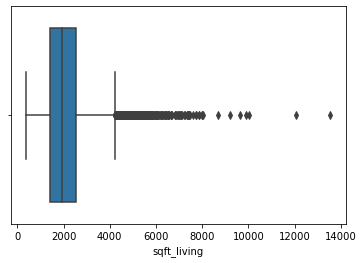

In [82]:
sns.boxplot(x=df_city['sqft_living'])

In [83]:
# calculate data statistics
data_mean1, data_std1 = mean(df_city.sqft_living), std(df_city.sqft_living)
cut_off = data_std1 * 3
lower, upper = data_mean1 - cut_off, data_mean1 + cut_off
sqft_outliers = [x for x in df_city.sqft_living if x < lower or x > upper]
sorted(sqft_outliers)

[4850,
 4850,
 4850,
 4850,
 4860,
 4860,
 4860,
 4860,
 4860,
 4870,
 4870,
 4870,
 4883,
 4890,
 4890,
 4890,
 4910,
 4910,
 4910,
 4910,
 4920,
 4920,
 4920,
 4930,
 4930,
 4930,
 4930,
 4940,
 4960,
 4960,
 4970,
 4980,
 4980,
 5000,
 5000,
 5000,
 5000,
 5010,
 5010,
 5010,
 5020,
 5020,
 5020,
 5030,
 5040,
 5040,
 5040,
 5050,
 5050,
 5050,
 5050,
 5060,
 5067,
 5070,
 5080,
 5090,
 5090,
 5100,
 5110,
 5110,
 5120,
 5120,
 5130,
 5150,
 5150,
 5150,
 5160,
 5170,
 5180,
 5180,
 5180,
 5180,
 5180,
 5190,
 5190,
 5190,
 5210,
 5220,
 5220,
 5230,
 5230,
 5230,
 5240,
 5250,
 5270,
 5270,
 5270,
 5280,
 5290,
 5300,
 5300,
 5305,
 5310,
 5310,
 5310,
 5310,
 5320,
 5330,
 5330,
 5340,
 5350,
 5350,
 5360,
 5370,
 5370,
 5370,
 5370,
 5370,
 5400,
 5403,
 5410,
 5420,
 5430,
 5430,
 5440,
 5440,
 5450,
 5450,
 5461,
 5470,
 5470,
 5480,
 5480,
 5480,
 5480,
 5490,
 5490,
 5510,
 5520,
 5530,
 5540,
 5540,
 5545,
 5550,
 5550,
 5550,
 5550,
 5570,
 5584,
 5600,
 5610,
 5610,
 5620,

In [84]:
df_out = df_city[(df_city.sqft_living <= 4850) & (df.sqft_living >= 1000)]
df_out.reset_index()

index     price  bathrooms  sqft_living  sqft_lot      lat     long  \
0          0  221900.0        1.0         1180      5650  47.5112 -122.257   
1          1  538000.0        2.0         2570      7242  47.7210 -122.319   
2          3  604000.0        3.0         1960      5000  47.5208 -122.393   
3          4  510000.0        2.0         1680      8080  47.6168 -122.045   
4          6  257500.0        2.0         1715      6819  47.3097 -122.327   
...      ...       ...        ...          ...       ...      ...      ...   
19781  21592  360000.0        2.0         1530      1131  47.6993 -122.346   
19782  21593  400000.0        2.0         2310      5813  47.5107 -122.362   
19783  21594  402101.0        1.0         1020      1350  47.5944 -122.299   
19784  21595  400000.0        2.0         1600      2388  47.5345 -122.069   
19785  21596  325000.0        1.0         1020      1076  47.5941 -122.299   

       has_basement  renovated  waterfront_1  view_1  view_2  view_3  view_4  \
0                 0          0             0       0       0       0       0   
1                 1          1             0       0       0       0       0   
2                 1          0             0       0       0       0       0   
3                 0          0             0       0       0       0       0   
4                 0          0             0       0       0       0       0   
...             ...        ...           ...     ...     ...     ...     ...   
19781             0          0             0       0       0       0       0   
19782             0          0             0       0       0       0       0   
19783             0          0             0       0       0       0       0   
19784             0          0             0       0       0       0       0   
19785             0          0             0       0       0       0       0   

       condition_2  condition_3  condition_4  condition_5  gra_2_5  gra_6  \
0                0            1            0            0        0      0   
1                0            1            0            0        0      0   
2                0            0            0            1        0      0   
3                0            1            0            0        0      0   
4                0            1            0            0        0      0   
...            ...          ...          ...          ...      ...    ...   
19781            0            1            0            0        0      0   
19782            0            1            0            0        0      0   
19783            0            1            0            0        0      0   
19784            0            1            0            0        0      0   
19785            0            1            0            0        0      0   

       gra_7  gra_8  gra_9  gra_11_13  fl_1_2  fl_3_4  mo_1_3  mo_4_6  mo_7_9  \
0          1      0      0          0       1       0       0       0       0   
1          1      0      0          0       1       0       0       0       0   
2          1      0      0          0       1       0       0       0       0   
3          0      1      0          0       1       0       1       0       0   
4          1      0      0          0       1       0       0       1       0   
...      ...    ...    ...        ...     ...     ...     ...     ...     ...   
19781      0      1      0          0       0       1       0       1       0   
19782      0      1      0          0       1       0       1       0       0   
19783      1      0      0          0       1       0       0       1       0   
19784      0      1      0          0       1       0       1       0       0   
19785      1      0      0          0       1       0       0       0       0   

       mo_10_12  bed_2  bed_3  bed_4  bed5_plus  Bellevue  Black_Diamond  \
0             1      0      1      0          0         0              0   
1             1      0      1      0          0         0  

<AxesSubplot:xlabel='price'>

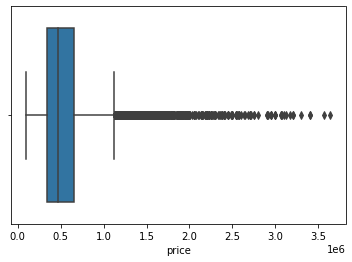

In [85]:
sns.boxplot(x=df_out['price'])

In [86]:
# calculate data statistics
data_mean, data_std = mean(df_out.price), std(df_out.price)

# identify outliers and sort them from lowest to highest
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

price_outliers = [x for x in df_out.price if x < lower or x > upper]
sorted(price_outliers)

[1500000.0,
 1500000.0,
 1500000.0,
 1500000.0,
 1500000.0,
 1500000.0,
 1500000.0,
 1500000.0,
 1500000.0,
 1500000.0,
 1500000.0,
 1500000.0,
 1500000.0,
 1500000.0,
 1500000.0,
 1500000.0,
 1510000.0,
 1510000.0,
 1510000.0,
 1510000.0,
 1510000.0,
 1510000.0,
 1520000.0,
 1520000.0,
 1520000.0,
 1520000.0,
 1530000.0,
 1530000.0,
 1530000.0,
 1530000.0,
 1540000.0,
 1540000.0,
 1540000.0,
 1540000.0,
 1550000.0,
 1550000.0,
 1550000.0,
 1550000.0,
 1550000.0,
 1550000.0,
 1550000.0,
 1560000.0,
 1560000.0,
 1560000.0,
 1560000.0,
 1560000.0,
 1560000.0,
 1570000.0,
 1570000.0,
 1570000.0,
 1570000.0,
 1570000.0,
 1570000.0,
 1580000.0,
 1580000.0,
 1580000.0,
 1580000.0,
 1580000.0,
 1580000.0,
 1580000.0,
 1580000.0,
 1580000.0,
 1580000.0,
 1580000.0,
 1580000.0,
 1580000.0,
 1580000.0,
 1590000.0,
 1600000.0,
 1600000.0,
 1600000.0,
 1600000.0,
 1600000.0,
 1600000.0,
 1600000.0,
 1600000.0,
 1600000.0,
 1600000.0,
 1600000.0,
 1600000.0,
 1600000.0,
 1600000.0,
 1600000.0,
 160

In [87]:
# subset price to eliminate outliers over 1000000
df_out = df_out[(df.price < 1000000) & (df.price > 100000)]
df_out.reset_index()

index     price  bathrooms  sqft_living  sqft_lot      lat     long  \
0          0  221900.0        1.0         1180      5650  47.5112 -122.257   
1          1  538000.0        2.0         2570      7242  47.7210 -122.319   
2          3  604000.0        3.0         1960      5000  47.5208 -122.393   
3          4  510000.0        2.0         1680      8080  47.6168 -122.045   
4          6  257500.0        2.0         1715      6819  47.3097 -122.327   
...      ...       ...        ...          ...       ...      ...      ...   
18504  21592  360000.0        2.0         1530      1131  47.6993 -122.346   
18505  21593  400000.0        2.0         2310      5813  47.5107 -122.362   
18506  21594  402101.0        1.0         1020      1350  47.5944 -122.299   
18507  21595  400000.0        2.0         1600      2388  47.5345 -122.069   
18508  21596  325000.0        1.0         1020      1076  47.5941 -122.299   

       has_basement  renovated  waterfront_1  view_1  view_2  view_3  view_4  \
0                 0          0             0       0       0       0       0   
1                 1          1             0       0       0       0       0   
2                 1          0             0       0       0       0       0   
3                 0          0             0       0       0       0       0   
4                 0          0             0       0       0       0       0   
...             ...        ...           ...     ...     ...     ...     ...   
18504             0          0             0       0       0       0       0   
18505             0          0             0       0       0       0       0   
18506             0          0             0       0       0       0       0   
18507             0          0             0       0       0       0       0   
18508             0          0             0       0       0       0       0   

       condition_2  condition_3  condition_4  condition_5  gra_2_5  gra_6  \
0                0            1            0            0        0      0   
1                0            1            0            0        0      0   
2                0            0            0            1        0      0   
3                0            1            0            0        0      0   
4                0            1            0            0        0      0   
...            ...          ...          ...          ...      ...    ...   
18504            0            1            0            0        0      0   
18505            0            1            0            0        0      0   
18506            0            1            0            0        0      0   
18507            0            1            0            0        0      0   
18508            0            1            0            0        0      0   

       gra_7  gra_8  gra_9  gra_11_13  fl_1_2  fl_3_4  mo_1_3  mo_4_6  mo_7_9  \
0          1      0      0          0       1       0       0       0       0   
1          1      0      0          0       1       0       0       0       0   
2          1      0      0          0       1       0       0       0       0   
3          0      1      0          0       1       0       1       0       0   
4          1      0      0          0       1       0       0       1       0   
...      ...    ...    ...        ...     ...     ...     ...     ...     ...   
18504      0      1      0          0       0       1       0       1       0   
18505      0      1      0          0       1       0       1       0       0   
18506      1      0      0          0       1       0       0       1       0   
18507      0      1      0          0       1       0       1       0       0   
18508      1      0      0          0       1       0       0       0       0   

       mo_10_12  bed_2  bed_3  bed_4  bed5_plus  Bellevue  Black_Diamond  \
0             1      0      1      0          0         0              0   
1             1      0      1      0          0         0  

In [88]:
df_out.describe()

price     bathrooms   sqft_living      sqft_lot           lat  \
count   18509.000000  18509.000000  18509.000000  1.850900e+04  18509.000000   
mean   480574.305635      2.046788   2034.437841  1.477121e+04     47.555453   
std    193429.920905      0.635791    700.802440  3.955809e+04      0.142905   
min    104950.000000      0.000000   1000.000000  5.200000e+02     47.155900   
25%    325000.000000      2.000000   1481.000000  5.025000e+03     47.453100   
50%    449000.000000      2.000000   1910.000000  7.598000e+03     47.567000   
75%    605000.000000      2.000000   2460.000000  1.043700e+04     47.680100   
max    999999.000000      8.000000   4850.000000  1.651359e+06     47.777600   

               long  has_basement     renovated  waterfront_1        view_1  \
count  18509.000000  18509.000000  18509.000000  18509.000000  18509.000000   
mean    -122.207714      0.391485      0.030256      0.002377      0.013345   
std        0.142429      0.488096      0.171294      0.048700      0.114750   
min     -122.519000      0.000000      0.000000      0.000000      0.000000   
25%     -122.325000      0.000000      0.000000      0.000000      0.000000   
50%     -122.219000      0.000000      0.000000      0.000000      0.000000   
75%     -122.117000      1.000000      0.000000      0.000000      0.000000   
max     -121.316000      1.000000      1.000000      1.000000      1.000000   

             view_2        view_3        view_4   condition_2   condition_3  \
count  18509.000000  18509.000000  18509.000000  18509.000000  18509.000000   
mean       0.038954      0.016749      0.006375      0.006267      0.654168   
std        0.193491      0.128332      0.079593      0.078919      0.475652   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      1.000000   
75%        0.000000      0.000000      0.000000      0.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        condition_4   condition_5       gra_2_5         gra_6         gra_7  \
count  18509.000000  18509.000000  18509.000000  18509.000000  18509.000000   
mean       0.264358      0.074450      0.004971      0.068669      0.453455   
std        0.441003      0.262509      0.070329      0.252898      0.497842   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              gra_8         gra_9     gra_11_13        fl_1_2        fl_3_4  \
count  18509.000000  18509.000000  18509.000000  18509.000000  18509.000000   
mean       0.313577      0.118429      0.040899      0.970177      0.029823   
std        0.463959      0.323124      0.198062      0.170104      0.170104   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      1.000000      0.000000   
50%        0.000000      0.000000      0.000000      1.000000      0.000000   
75%        1.000000      0.000000      0.000000      1.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             mo_1_3        mo_4_6        mo_7_9      mo_10_12         bed_2  \
count  18509.000000  18509.000000  18509.000000  18509.000000  18509.000000   
mean       0.190664      0.314171      0.275920      0.219245      0.096007   
std        0.392835      0.464198      0.446989      0.413746      0.294609   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000    

## Model 4 

**Dropping outliers with Model 2**

In [89]:
outcome = 'price'
predictors = df_out.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
f = outcome + '~' + pred_sum
model4 = ols(formula=f, data=df_out).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     930.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        02:23:38   Log-Likelihood:            -2.3966e+05
No. Observations:               18509   AIC:                         4.794e+05
Df Residuals:                   18456   BIC:                         4.798e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.313e+07    1.2e+06    -27.585      0.000   -3.55e+07   -3.08e+07
bathrooms      7295.8882   1505.591      4.846      0.000    4344.791    1.02e+04
sqft_living      99.1667      1.901     52.164      0.000      95.440     102.893
sqft_lot          0.3039      0.021     14.667      0.000       0.263       0.344
lat              5.4e+05   1.19e+04     45.461      0.000    5.17e+05    5.63e+05
long          -3.106e+05   1.86e+04    -16.677      0.000   -3.47e+05   -2.74e+05
has_basement  -7412.1485   1749.936     -4.236      0.000   -1.08e+04   -3982.112
renovated      5.989e+04   4435.088     13.504      0.000    5.12e+04    6.86e+04
waterfront_1    1.23e+05   1.78e+04      6.899      0.000     8.8e+04    1.58e+05
view_1         5.797e+04   6602.673      8.780      0.000     4.5e+04    7.09e+04
view_2         6.053e+04   3963.746     15.271      0.000    5.28e+04    6.83e+04
view_3         6.559e+04   5978.043     10.972      0.000    5.39e+04    7.73e+04
view_4         1.424e+05   1.07e+04     13.268      0.000    1.21e+05    1.63e+05
condition_2    4.881e+04   2.89e+04      1.689      0.091   -7819.931    1.05e+05
condition_3     6.71e+04   2.73e+04      2.454      0.014    1.35e+04    1.21e+05
condition_4    9.363e+04   2.74e+04      3.423      0.001       4e+04    1.47e+05
condition_5    1.359e+05   2.75e+04      4.949      0.000    8.21e+04     1.9e+05
gra_2_5       -5.613e+06      2e+05    -28.035      0.000   -6.01e+06   -5.22e+06
gra_6         -5.622e+06      2e+05    -28.102      0.000   -6.01e+06   -5.23e+06
gra_7         -5.572e+06      2e+05    -27.837      0.000   -5.96e+06   -5.18e+06
gra_8         -5.514e+06      2e+05    -27.530      0.000   -5.91e+06   -5.12e+06
gra_9         -5.432e+06      2e+05    -27.117      0.000   -5.82e+06   -5.04e+06
gra_11_13     -5.378e+06      2e+05    -26.845      0.000   -5.77e+06   -4.99e+06
fl_1_2        -1.655e+07      6e+05    -27.570      0.000   -1.77e+07   -1.54e+07
fl_3_4        -1.658e+07   6.01e+05    -27.599      0.000   -1.78e+07   -1.54e+07
mo_1_3        -8.277e+06      3e+05    -27.566      0.000   -8.87e+06   -7.69e+06
mo_4_6        -8.274e+06      3e+05    -27.558      0.000   -8.86e+06   -7.69e+06
mo_7_9        -8.288e+06      3e+05    -27.600      0.000   -8.88e+06    -7.7e+06
mo_10_12      -8.292e+06      3e+05    -27.615      0.000   -8.88e+06    -7.7e+06
bed_2          5743.7046   1.36e+04      0.422      0.673   -2.09e+04    3.24e+04
bed_3         -6643.8026   1.35e+04     -0.493      0.622   -3.31e+04    1.98e+04
bed_4         -7934.0463   1.36e+04     -0.585      0.559   -3.45e+04    1.86e+04
bed5_plus     -2.751e+04   1.39e+04     -1.986      0.047   -5.47e+04    -365.721
Bellevue       1.697e+05   6044.459     28.072      0.000    1.58e+05    1.82e+05
Black_Diamond   1.36e+05   1.19e+04     11.409   

**Of the Rsquared dropped compared to Model 2 because we lost quite a bit of data. However it didn't dropped by much.**

### Model 4 Train-Test-Split 4

In [90]:
y = df_out['price']
X = predictors

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

14807 3702 14807 3702


In [92]:
# Model 4
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print('MAE:', mean_absolute_error(y_test, y_hat_test))
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)
print('Root Mean Squared Error Train:', rmse_train)
print('Root Mean Squared Error Test:', rmse_test)

MAE: 77321.86979987318
Train Mean Squared Error: 10256778156.416628
Test Mean Squared Error: 10651650430.105947
Root Mean Squared Error Train: 101275.75305282419
Root Mean Squared Error Test: 103206.83325296803


**Observations:
Even though the Rscore went down a little, the MAE and the RSME went down also which is a great start. There's only a small difference between the root mean squared error of the train and test data!**

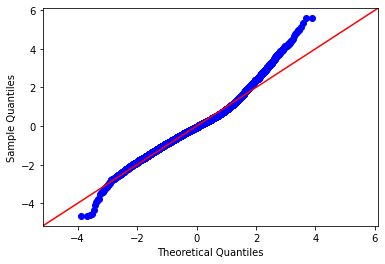

In [93]:
residuals = model4.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

**There's still room for improvement as the data doesn't hug the line perfectly. This plot shows wider tails which might have to do with high price houses still.**

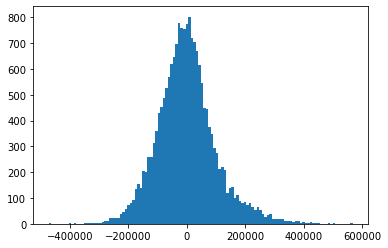

In [94]:
plt.hist(residuals, bins='auto');

**Not perfect but does have a normal look. So far this is the best model**

## Model 5 
**with log transformation**

In [97]:
log_cols = df_log_norm
df_log_1 = df_out.join(log_cols)
df_log_1.drop(['sqft_living', 'sqft_lot', 'bathrooms'], axis=1, inplace=True)

In [98]:
outcome = 'price'
predictors = df_log_1.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
f = outcome + '~' + pred_sum
model5 = ols(formula=f, data=df_log_1).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     929.9
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        02:30:46   Log-Likelihood:            -2.3979e+05
No. Observations:               18509   AIC:                         4.797e+05
Df Residuals:                   18457   BIC:                         4.801e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.157e+07   1.22e+06    -25.939      0.000    -3.4e+07   -2.92e+07
lat              5.393e+05    1.2e+04     45.061      0.000    5.16e+05    5.63e+05
long            -2.883e+05   1.89e+04    -15.289      0.000   -3.25e+05   -2.51e+05
has_basement    -8938.0397   1761.336     -5.075      0.000   -1.24e+04   -5485.659
renovated        6.159e+04   4464.469     13.795      0.000    5.28e+04    7.03e+04
waterfront_1      1.17e+05    1.8e+04      6.515      0.000    8.18e+04    1.52e+05
view_1           5.862e+04   6652.833      8.811      0.000    4.56e+04    7.17e+04
view_2           6.263e+04   3996.436     15.671      0.000    5.48e+04    7.05e+04
view_3           7.148e+04   6020.937     11.871      0.000    5.97e+04    8.33e+04
view_4           1.433e+05   1.08e+04     13.248      0.000    1.22e+05    1.65e+05
condition_2      4.946e+04   2.91e+04      1.700      0.089   -7576.492    1.06e+05
condition_3      6.434e+04   2.75e+04      2.336      0.020    1.03e+04    1.18e+05
condition_4      9.065e+04   2.76e+04      3.290      0.001    3.66e+04    1.45e+05
condition_5      1.331e+05   2.76e+04      4.812      0.000    7.89e+04    1.87e+05
gra_2_5         -5.354e+06   2.03e+05    -26.386      0.000   -5.75e+06   -4.96e+06
gra_6           -5.362e+06   2.03e+05    -26.448      0.000   -5.76e+06   -4.96e+06
gra_7           -5.318e+06   2.03e+05    -26.221      0.000   -5.72e+06   -4.92e+06
gra_8           -5.262e+06   2.03e+05    -25.933      0.000   -5.66e+06   -4.86e+06
gra_9           -5.171e+06   2.03e+05    -25.483      0.000   -5.57e+06   -4.77e+06
gra_11_13       -5.099e+06   2.03e+05    -25.125      0.000    -5.5e+06    -4.7e+06
fl_1_2          -1.577e+07   6.08e+05    -25.927      0.000    -1.7e+07   -1.46e+07
fl_3_4          -1.579e+07   6.09e+05    -25.951      0.000    -1.7e+07   -1.46e+07
mo_1_3          -7.885e+06   3.04e+05    -25.920      0.000   -8.48e+06   -7.29e+06
mo_4_6          -7.883e+06   3.04e+05    -25.913      0.000   -8.48e+06   -7.29e+06
mo_7_9          -7.896e+06   3.04e+05    -25.955      0.000   -8.49e+06    -7.3e+06
mo_10_12          -7.9e+06   3.04e+05    -25.968      0.000    -8.5e+06    -7.3e+06
bed_2            1020.6043   1.37e+04      0.074      0.941   -2.59e+04    2.79e+04
bed_3           -1.964e+04   1.36e+04     -1.446      0.148   -4.63e+04    6977.144
bed_4           -2.356e+04   1.37e+04     -1.722      0.085   -5.04e+04    3257.154
bed5_plus       -3.345e+04   1.39e+04     -2.399      0.016   -6.08e+04   -6114.765
Bellevue          1.65e+05   6081.906     27.136      0.000    1.53e+05    1.77e+05
Black_Diamond    1.417e+05    1.2e+04     11.799      0.000    1.18e+05    1.65e+05
Bothell         -8.218e+04   9850.741     -8.343      0.000   -1.01e+05   -6.29e+04
Carnation        3.783e+04   1.34e+04      2.816      0.005

**The Rsquared went down by 0.004, so maybe the log transform doesn't help.**

## Model 6
**Dropping high p-values**

In [99]:
df_out_2 = df_out.drop(['condition_2', 'bed_2', 'bed_3', 'bed_4'], axis=1)

In [100]:
predictors = df_out_2.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
f = outcome + '~' + pred_sum
model6 = ols(formula=f, data=df_out_2).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     1006.
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        02:30:46   Log-Likelihood:            -2.3967e+05
No. Observations:               18509   AIC:                         4.794e+05
Df Residuals:                   18460   BIC:                         4.798e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.308e+07    1.2e+06    -27.537      0.000   -3.54e+07   -3.07e+07
bathrooms      6669.6358   1500.078      4.446      0.000    3729.345    9609.927
sqft_living      97.1451      1.754     55.398      0.000      93.708     100.582
sqft_lot          0.3075      0.021     14.856      0.000       0.267       0.348
lat            5.417e+05   1.19e+04     45.614      0.000    5.18e+05    5.65e+05
long          -3.096e+05   1.86e+04    -16.614      0.000   -3.46e+05   -2.73e+05
has_basement  -6957.6001   1747.510     -3.981      0.000   -1.04e+04   -3532.318
renovated      6.027e+04   4434.879     13.589      0.000    5.16e+04     6.9e+04
waterfront_1   1.238e+05   1.78e+04      6.946      0.000    8.89e+04    1.59e+05
view_1         5.887e+04   6603.086      8.915      0.000    4.59e+04    7.18e+04
view_2         6.094e+04   3963.418     15.377      0.000    5.32e+04    6.87e+04
view_3         6.606e+04   5978.893     11.049      0.000    5.43e+04    7.78e+04
view_4         1.432e+05   1.07e+04     13.340      0.000    1.22e+05    1.64e+05
condition_3    2.343e+04   9053.093      2.588      0.010    5682.944    4.12e+04
condition_4    4.975e+04   9096.864      5.468      0.000    3.19e+04    6.76e+04
condition_5    9.168e+04   9397.089      9.756      0.000    7.33e+04     1.1e+05
gra_2_5       -5.606e+06      2e+05    -27.989      0.000      -6e+06   -5.21e+06
gra_6         -5.614e+06      2e+05    -28.054      0.000   -6.01e+06   -5.22e+06
gra_7         -5.565e+06      2e+05    -27.793      0.000   -5.96e+06   -5.17e+06
gra_8         -5.506e+06      2e+05    -27.484      0.000    -5.9e+06   -5.11e+06
gra_9         -5.424e+06      2e+05    -27.068      0.000   -5.82e+06   -5.03e+06
gra_11_13     -5.369e+06      2e+05    -26.792      0.000   -5.76e+06   -4.98e+06
fl_1_2        -1.653e+07   6.01e+05    -27.523      0.000   -1.77e+07   -1.54e+07
fl_3_4        -1.656e+07   6.01e+05    -27.551      0.000   -1.77e+07   -1.54e+07
mo_1_3        -8.265e+06      3e+05    -27.519      0.000   -8.85e+06   -7.68e+06
mo_4_6        -8.263e+06      3e+05    -27.510      0.000   -8.85e+06   -7.67e+06
mo_7_9        -8.276e+06      3e+05    -27.553      0.000   -8.86e+06   -7.69e+06
mo_10_12       -8.28e+06      3e+05    -27.567      0.000   -8.87e+06   -7.69e+06
bed5_plus     -1.988e+04   2991.743     -6.646      0.000   -2.57e+04    -1.4e+04
Bellevue        1.69e+05   6046.240     27.951      0.000    1.57e+05    1.81e+05
Black_Diamond   1.36e+05   1.19e+04     11.404      0.000    1.13e+05    1.59e+05
Bothell       -7.947e+04   9783.662     -8.123      0.000   -9.86e+04   -6.03e+04
Carnation      3.049e+04   1.33e+04      2.286      0.022    4342.686    5.66e+04
Duvall        -4.213e+04    1.1e+04     -3.819      0.000   -6.38e+04   -2.05e+04
Enumclaw       1.265e+05   8887.253     14.231   

### Train-Test-Split

In [101]:
y = df_out_2['price']
X = predictors

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

14807 3702 14807 3702


In [103]:
# Baseline Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print('MAE:', mean_absolute_error(y_test, y_hat_test))
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)
print('Root Mean Squared Error Train:', rmse_train)
print('Root Mean Squared Error Test:', rmse_test)

MAE: 76138.20474465392
Train Mean Squared Error: 10311496440.126705
Test Mean Squared Error: 10519803089.24193
Root Mean Squared Error Train: 101545.53875048723
Root Mean Squared Error Test: 102566.09132282429


**Model 4 still has better results, so keeping columns in**

# Final Model Conclusion

In [104]:
outcome = 'price'
predictors = df_out.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
f = outcome + '~' + pred_sum
model4 = ols(formula=f, data=df_out).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     930.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        02:30:46   Log-Likelihood:            -2.3966e+05
No. Observations:               18509   AIC:                         4.794e+05
Df Residuals:                   18456   BIC:                         4.798e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.313e+07    1.2e+06    -27.585      0.000   -3.55e+07   -3.08e+07
bathrooms      7295.8882   1505.591      4.846      0.000    4344.791    1.02e+04
sqft_living      99.1667      1.901     52.164      0.000      95.440     102.893
sqft_lot          0.3039      0.021     14.667      0.000       0.263       0.344
lat              5.4e+05   1.19e+04     45.461      0.000    5.17e+05    5.63e+05
long          -3.106e+05   1.86e+04    -16.677      0.000   -3.47e+05   -2.74e+05
has_basement  -7412.1485   1749.936     -4.236      0.000   -1.08e+04   -3982.112
renovated      5.989e+04   4435.088     13.504      0.000    5.12e+04    6.86e+04
waterfront_1    1.23e+05   1.78e+04      6.899      0.000     8.8e+04    1.58e+05
view_1         5.797e+04   6602.673      8.780      0.000     4.5e+04    7.09e+04
view_2         6.053e+04   3963.746     15.271      0.000    5.28e+04    6.83e+04
view_3         6.559e+04   5978.043     10.972      0.000    5.39e+04    7.73e+04
view_4         1.424e+05   1.07e+04     13.268      0.000    1.21e+05    1.63e+05
condition_2    4.881e+04   2.89e+04      1.689      0.091   -7819.931    1.05e+05
condition_3     6.71e+04   2.73e+04      2.454      0.014    1.35e+04    1.21e+05
condition_4    9.363e+04   2.74e+04      3.423      0.001       4e+04    1.47e+05
condition_5    1.359e+05   2.75e+04      4.949      0.000    8.21e+04     1.9e+05
gra_2_5       -5.613e+06      2e+05    -28.035      0.000   -6.01e+06   -5.22e+06
gra_6         -5.622e+06      2e+05    -28.102      0.000   -6.01e+06   -5.23e+06
gra_7         -5.572e+06      2e+05    -27.837      0.000   -5.96e+06   -5.18e+06
gra_8         -5.514e+06      2e+05    -27.530      0.000   -5.91e+06   -5.12e+06
gra_9         -5.432e+06      2e+05    -27.117      0.000   -5.82e+06   -5.04e+06
gra_11_13     -5.378e+06      2e+05    -26.845      0.000   -5.77e+06   -4.99e+06
fl_1_2        -1.655e+07      6e+05    -27.570      0.000   -1.77e+07   -1.54e+07
fl_3_4        -1.658e+07   6.01e+05    -27.599      0.000   -1.78e+07   -1.54e+07
mo_1_3        -8.277e+06      3e+05    -27.566      0.000   -8.87e+06   -7.69e+06
mo_4_6        -8.274e+06      3e+05    -27.558      0.000   -8.86e+06   -7.69e+06
mo_7_9        -8.288e+06      3e+05    -27.600      0.000   -8.88e+06    -7.7e+06
mo_10_12      -8.292e+06      3e+05    -27.615      0.000   -8.88e+06    -7.7e+06
bed_2          5743.7046   1.36e+04      0.422      0.673   -2.09e+04    3.24e+04
bed_3         -6643.8026   1.35e+04     -0.493      0.622   -3.31e+04    1.98e+04
bed_4         -7934.0463   1.36e+04     -0.585      0.559   -3.45e+04    1.86e+04
bed5_plus     -2.751e+04   1.39e+04     -1.986      0.047   -5.47e+04    -365.721
Bellevue       1.697e+05   6044.459     28.072      0.000    1.58e+05    1.82e+05
Black_Diamond   1.36e+05   1.19e+04     11.409   

## Model 4 - best features
* Grade
* Location
* Bathrooms

In [106]:
fig = px.box(df, x='grade', y='price').update_xaxes(categoryorder = 'total ascending')
fig.show()

**Grade**
Looking at the graph you can get a high grade house way below the average cost for houses. Also you can gain more for your house if you upgrade, let's say, a grade 8 to a grade 9. Thats at least a net worth of $100k.

In [107]:
df_cities = df_cities[(df_cities.price < 1000000) & (df_cities.price > 100000)]

In [108]:
fig = px.box(df_cities, x='city', y='price').update_xaxes(categoryorder = 'median ascending')
fig.show()

**Location** - Here you can get a glimpse into what cities are the most exspensive. This can help narrow down options depending on what you're clients want.

In [109]:
fig = px.box(df_cities, x='bathrooms', y='price').update_xaxes(categoryorder = 'total ascending')
fig.show()

In [110]:
b1 = 321000
b2 = 442000
b3 = 582400
b4 = 729000

def percentage(x1,x2):
    increase = x2 - x1
    perc_increase = increase / x1 * 100
    return perc_increase

In [111]:
bathrooms = ['b1_b2', 'b1_b3', 'b1_b4', 'b2_b3', 'b2_b4', 'b3_b4']
per_baths = pd.DataFrame(bathrooms, columns=['Bathrooms'])
per_baths

Bathrooms
0     b1_b2
1     b1_b3
2     b1_b4
3     b2_b3
4     b2_b4
5     b3_b4

In [112]:
one_two = percentage(b1,b2)
one_three = percentage(b1,b3)
one_four = percentage(b1,b4)
two_three = percentage(b2,b3)
two_four = percentage(b2,b4)
three_four = percentage(b3,b4)
lst = [one_two, one_three, one_four, two_three, two_four, three_four]

perc_inc = pd.DataFrame(lst, columns=['%_increase'])

In [113]:
bath_perc = per_baths.join(perc_inc, how='outer')
bath_perc

Bathrooms  %_increase
0     b1_b2   37.694704
1     b1_b3   81.433022
2     b1_b4  127.102804
3     b2_b3   31.764706
4     b2_b4   64.932127
5     b3_b4   25.171703

Text(0.5, 1.0, 'Percent Increase Based on Median')

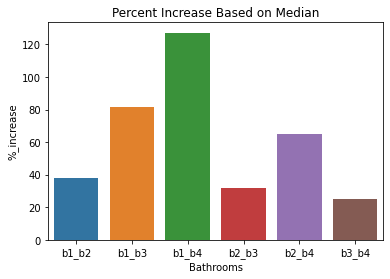

In [114]:
sns.barplot(x='Bathrooms', y='%_increase', data=bath_perc)
plt.title('Percent Increase Based on Median')

Here you can get a look at the increase in price if you want to get a certain amount of bathrooms. 

# Further Work


For further observations to get the best models:
* Price range: Getting more information on the maximum amount first time buyers expects from King County since their average is higher than the nation's.
* Neighborhood amenitites: If dealing with family 3 plus, then looking at neighborhoods with parks, kid-friendly places, and schools, etc.
* Renovations: Dive into the profits behind renovating or upgrading the homes to hopefully increase home equity.